<a href="https://colab.research.google.com/github/Clare0478/ASP.NET_MVC_Identuty-/blob/main/Smart_on_fhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **JWK轉成PEM (JWK Set directly)**

In [ ]:
!pip install cryptography


取模數和指數

*   「n」（模數）參數包含 RSA 公鑰的模值。它表示為 Base64urlUInt 編碼值。


*   「e」（指數）參數包含 RSA 公鑰的指數值。它表示為 Base64urlUInt 編碼值。


JWK 到 RSA 字段

* 參數：表示RSA 金鑰的nBase64 URL 編碼字串。modulus

* 參數：表示RSA 金鑰的eBase64 URL 編碼字串。public exponent

* 參數：表示RSA 金鑰的dBase64 URL 編碼字串。private exponent

* 參數：表示RSA 金鑰的pBase64 URL 編碼字串。secret prime factor

* 參數：表示RSA 金鑰的qBase64 URL 編碼字串。secret prime factor

* 參數：表示RSA 金鑰的dpBase64 URL 編碼字串。first factor CRT exponentd mod (p-1)

* 參數：表示RSA 金鑰的dqBase64 URL 編碼字串。second factor CRT exponentd mod (q-1)

* 參數：表示RSA 金鑰的qiBase64 URL 編碼字串。first CRT coefficientq^-1 mod p

相關連結

https://github.com/jpf/okta-jwks-to-pem/blob/master/README.md

https://stackoverflow.com/questions/70974044/how-to-convert-jwk-to-pem

https://8gwifi.org/jwkconvertfunctions.jsp


In [ ]:
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
import base64
import json

#JWK資料
jwk_data = {
  "kty": "RSA", #加密演算法類型
  "alg": "RS256", #與金鑰一起使用的特定加密演算法
  "kid": "26887d3ee3293c526c0e6dd05f122df53aa3f13d7dad06d25e266fa6f51db79fb52422aaf79f121476237e98dcd6640350fee47fec70e783544ec9a36e4605bc", #密鑰唯一識別碼
  "use": "sig", #密鑰用途(SIG:簽名)
  "n": "14m79mVwIE0JxQdKrgXVf7dVcBS90U0TvG7Yf7dG4NJocz1PNUrKrzGhe_FryOe0JahL_sjA2_rKw7NBCpuVx_zSPFRw6kqjewGicjXGus5Fmlf3zDuqwV4BWIFHyQexMPOly0agFfcM0M0MgBULXjINgBs9MwnRv7JVfRoGqXHsNM45djFDd3o4liu4LPlge_DquZUFLNu-BYAyAlWkz0H2TepZhGrN9VEPmxzQkNzXc1R4MpZvbxrRRgaAA2z094ik3hk86JhfyFq-LDcueZhtshmrYZ95LWgMlQ7PixkeK1HkeEYMt20lmNzR8B8KabimYmibxA4Ay9gpRwfp-Q",#模數為RSA公鑰
  "e": "AQAB" #指數為RSA公鑰
}

# 指數（e）和模數（n）包含了公鑰的關鍵資訊(從JWK中提取的模數和指數是RSA公鑰的部分，將它們重新組合成完整的RSA公鑰)
# JWK資料中提取模數（n）和指數（e）-> 將Base64編碼的字串解碼為原始的二進位數據
modulus = base64.urlsafe_b64decode(jwk_data["n"].encode() + b'=' * (4 - len(jwk_data["n"]) % 4))
exponent = base64.urlsafe_b64decode(jwk_data["e"].encode() + b'=' * (4 - len(jwk_data["e"]) % 4))
# 4 - len(jwk_data["n"]) % 4 的目的是確保Base64編碼的字串長度是4的倍數。 Base64編碼通常以4個字元為一組，所以如果不足4的倍數，就需要添加填充字元（'='）來填補。這是Base64編碼的標準要求。

# 建立RSA公鑰(提取的模數和指數用於建立RSA公鑰對象)
public_key = rsa.RSAPublicNumbers(n=int.from_bytes(modulus, byteorder='big'), e=int.from_bytes(exponent, byteorder='big')).public_key()
# byteorder='big' -> 位元組順序 (Byte Order) https://blog.gtwang.org/programming/difference-between-big-endian-and-little-endian-implementation-in-c/

# print(public_key)

# 轉為PEM格式
pem_key = public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
)

pem_key_str = pem_key.decode()

print(pem_key_str)

-----BEGIN PUBLIC KEY-----
MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEA14m79mVwIE0JxQdKrgXV
f7dVcBS90U0TvG7Yf7dG4NJocz1PNUrKrzGhe/FryOe0JahL/sjA2/rKw7NBCpuV
x/zSPFRw6kqjewGicjXGus5Fmlf3zDuqwV4BWIFHyQexMPOly0agFfcM0M0MgBUL
XjINgBs9MwnRv7JVfRoGqXHsNM45djFDd3o4liu4LPlge/DquZUFLNu+BYAyAlWk
z0H2TepZhGrN9VEPmxzQkNzXc1R4MpZvbxrRRgaAA2z094ik3hk86JhfyFq+LDcu
eZhtshmrYZ95LWgMlQ7PixkeK1HkeEYMt20lmNzR8B8KabimYmibxA4Ay9gpRwfp
+QIDAQAB
-----END PUBLIC KEY-----



**PEM Decoded:**

https://irrte.ch/jwt-js-decode/pem2jwk.html

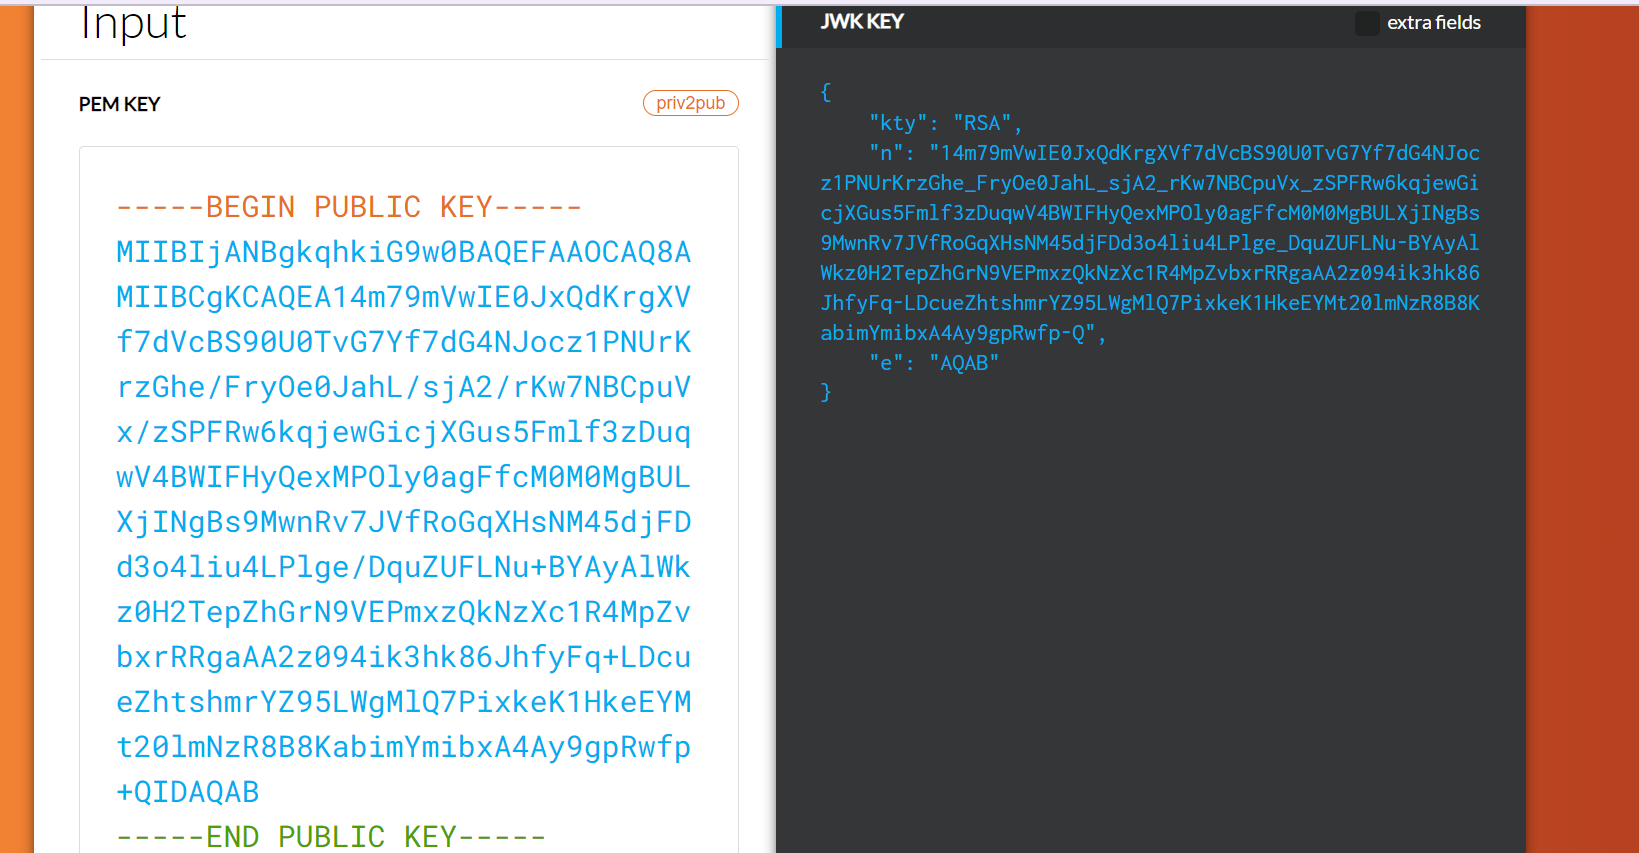

## **PEM和URL轉成JWT (生成Client_Id)**

In [ ]:
!pip install PyJWT

In [ ]:
import jwt

# Service URl
service_url = "http://10.20.15.157:4013/v/r4/fhir"



# payload要包含公鑰的PEM憑證和SERVICE URL資訊
client_id_payload = {
    "pub_key": pem_key_str, #上面生成的公鑰PEM
    "iss": service_url, #Service Url
    "accessTokensExpireIn": 15, #Token生命週期
    "iat": 1698143275 #JWT簽發時間
}

private_key = "screat"

# print(private_key)
# client_id_jwt = jwt.encode(client_id_payload, key=None, algorithm='none')
jwt_token = jwt.encode(client_id_payload, key=private_key, algorithm='HS256')

print(jwt_token)

eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJwdWJfa2V5IjoiLS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS1cbk1JSUJJakFOQmdrcWhraUc5dzBCQVFFRkFBT0NBUThBTUlJQkNnS0NBUUVBMTRtNzltVndJRTBKeFFkS3JnWFZcbmY3ZFZjQlM5MFUwVHZHN1lmN2RHNE5Kb2N6MVBOVXJLcnpHaGUvRnJ5T2UwSmFoTC9zakEyL3JLdzdOQkNwdVZcbngvelNQRlJ3NmtxamV3R2ljalhHdXM1Rm1sZjN6RHVxd1Y0QldJRkh5UWV4TVBPbHkwYWdGZmNNME0wTWdCVUxcblhqSU5nQnM5TXduUnY3SlZmUm9HcVhIc05NNDVkakZEZDNvNGxpdTRMUGxnZS9EcXVaVUZMTnUrQllBeUFsV2tcbnowSDJUZXBaaEdyTjlWRVBteHpRa056WGMxUjRNcFp2YnhyUlJnYUFBMnowOTRpazNoazg2SmhmeUZxK0xEY3VcbmVaaHRzaG1yWVo5NUxXZ01sUTdQaXhrZUsxSGtlRVlNdDIwbG1OelI4QjhLYWJpbVltaWJ4QTRBeTlncFJ3ZnBcbitRSURBUUFCXG4tLS0tLUVORCBQVUJMSUMgS0VZLS0tLS1cbiIsImlzcyI6Imh0dHA6Ly8xMC4yMC4xNS4xNTc6NDAxMy92L3I0L2ZoaXIiLCJhY2Nlc3NUb2tlbnNFeHBpcmVJbiI6MTUsImlhdCI6MTY5ODE0MzI3NX0.dR5SaAxmQr1Iel_LFh-UB-yx_t0ok7p33QwdQbsSH5E


**JWT Decoded:** https://jwt.io/

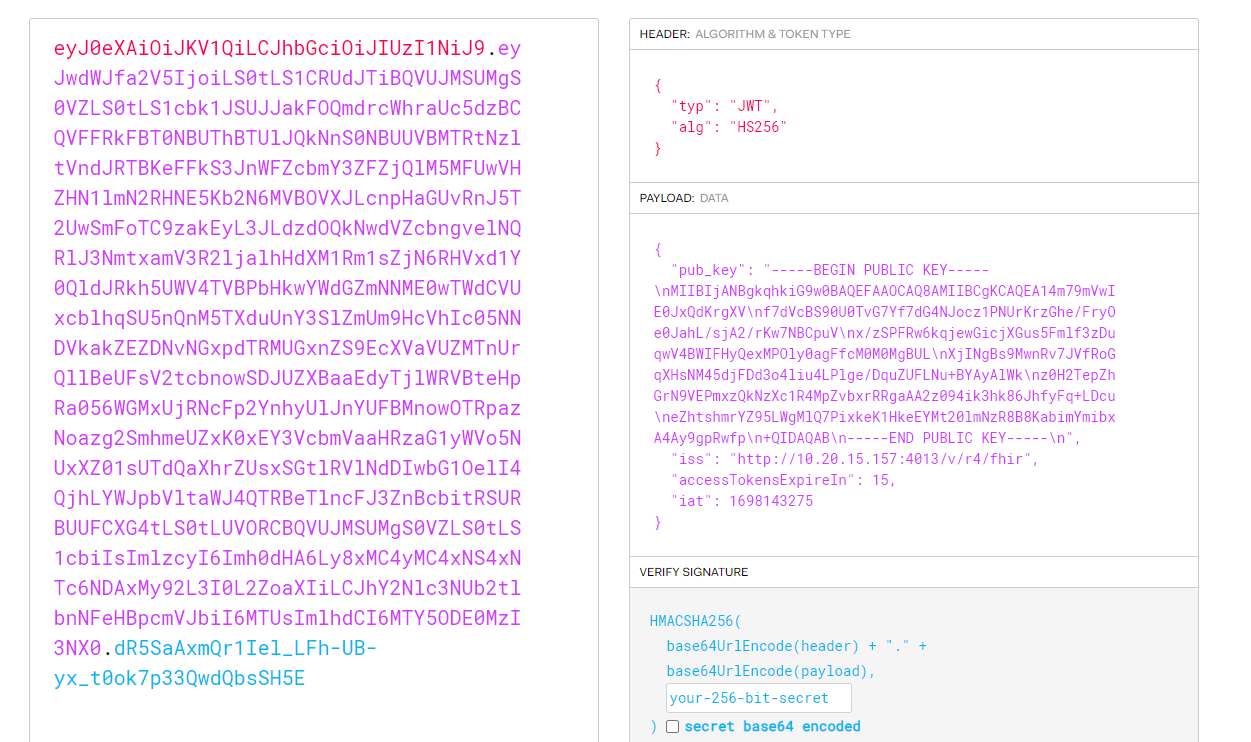

## **總體結果:**

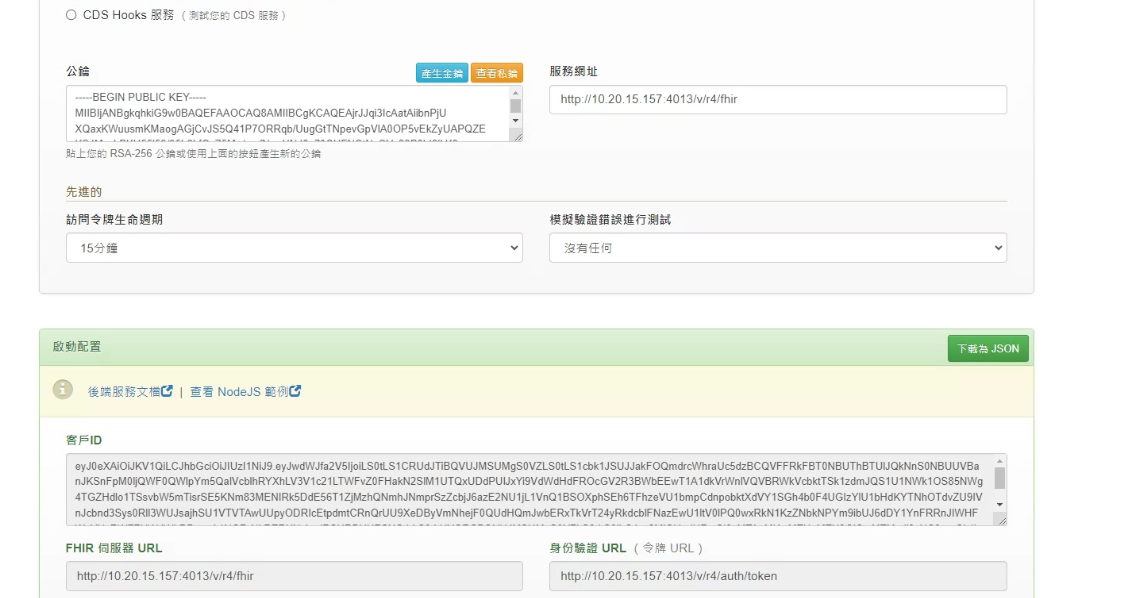